In [1]:
# import required libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as  plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [2]:
# Import seeds dataset
df = pd.read_table('seeds_dataset.txt', sep="\t",on_bad_lines='skip')

# set the column names
df.columns = ["area", "parimeter", "compactness", "length_of_kernal", "width_of_kernal", "asymmetry", 
                "length_of_kernel_groove", "type"]

# check the number of nan values in each column
df.isnull().sum(axis = 0)

# compactness contains one nan value
df['compactness'] = df['compactness'].fillna(0)

# set the input variables
x = df[['area', 'length_of_kernal','width_of_kernal', 'asymmetry', 'length_of_kernel_groove']]

# target value
y = df['type']

# create train, test and split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.5, random_state=5)

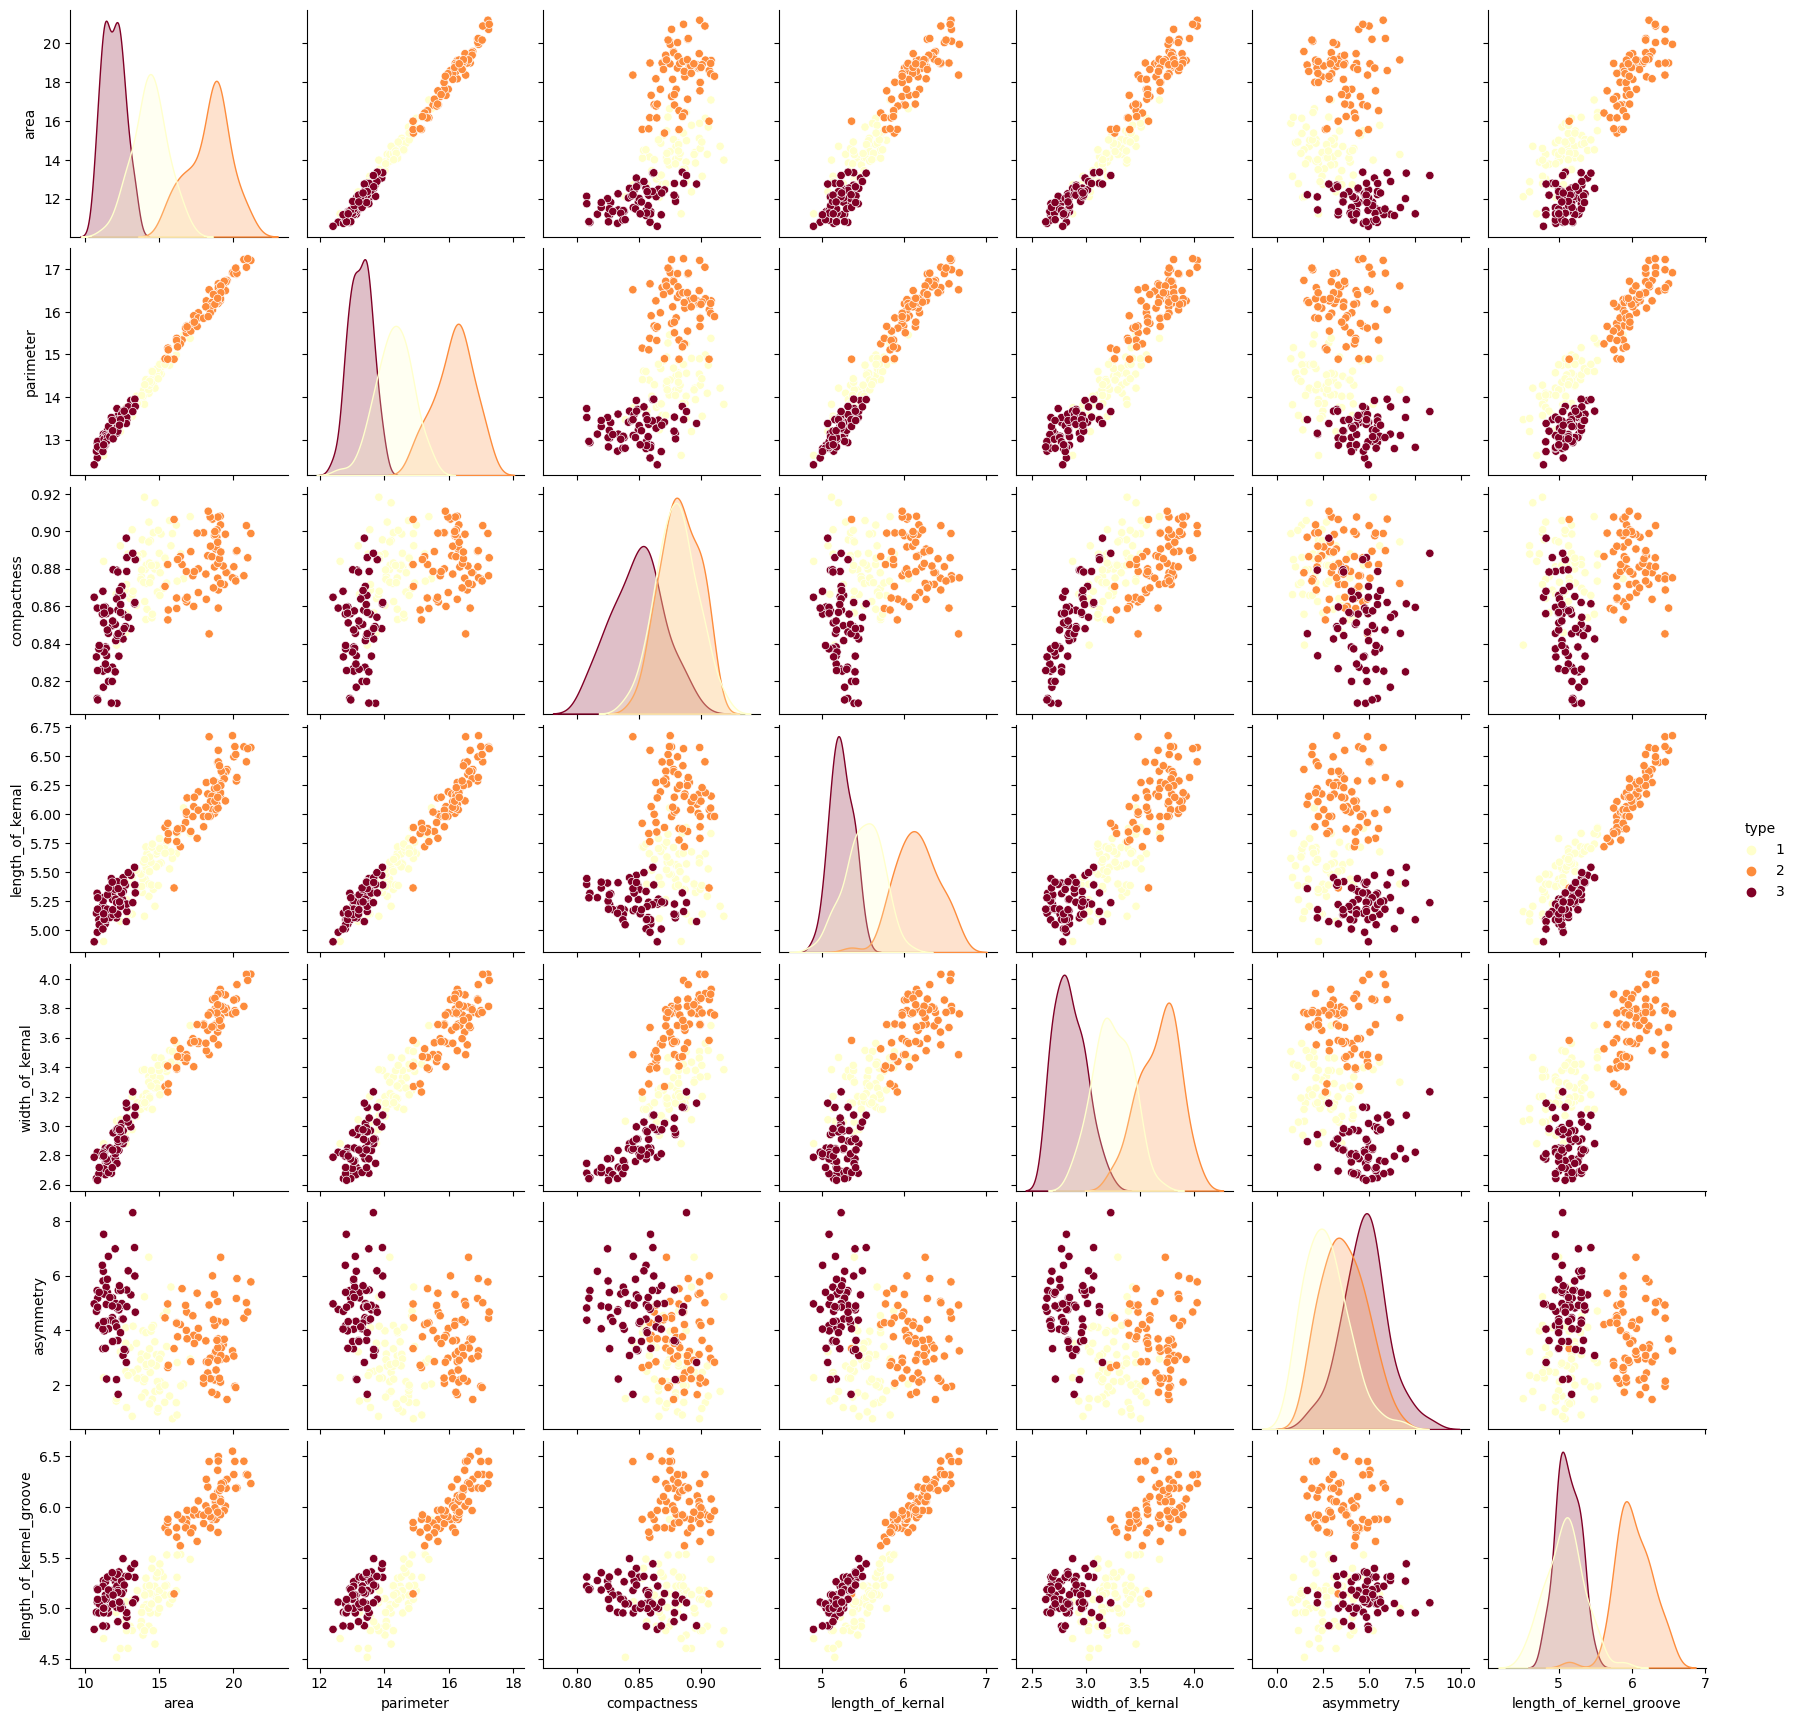

In [3]:
sns.pairplot(df, hue = 'type', palette = 'YlOrRd')
plt.show()

In [4]:
# Scale and transform our features between -1 & 1
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)

x_train = scaling.transform(X_train)
x_test = scaling.transform(X_test)

# create our DT_Model model with Regularization, maximum-margin & maximun iteration
DT_Model = DecisionTreeClassifier()

# fit the training data to the model
DT_Model.fit(x_train, Y_train)

# print the score of our model
print("DT_Model Model Accuracy : ",DT_Model.score(x_test,Y_test))

#set the y_pred to our model.predict 
y_pred = DT_Model.predict(x_test)

# create a confusion matrix and pass i y_test and y_pred


DT_Model Model Accuracy :  0.8484848484848485


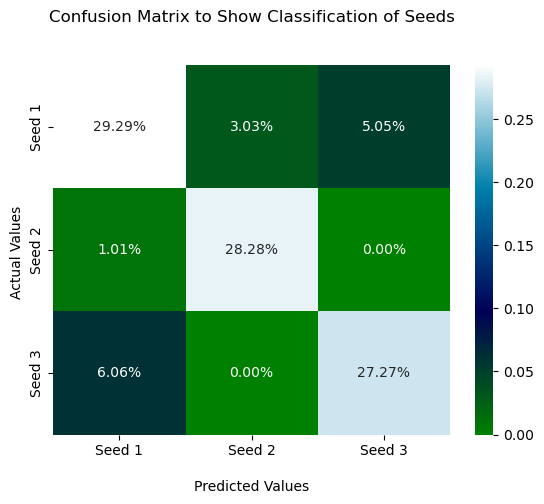

In [5]:
cf_matrix1 = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cf_matrix1/np.sum(cf_matrix1), annot=True, 
            fmt='.2%', cmap='ocean')

ax.set_title('Confusion Matrix to Show Classification of Seeds\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Seed 1','Seed 2', 'Seed 3'])
ax.yaxis.set_ticklabels(['Seed 1','Seed 2', 'Seed 3'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def decision_regions(X, y, clf, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'o', 'x', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure(figsize=(15, 10))
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],marker=markers[idx], label=cl)
    plt.legend(loc=2)
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')

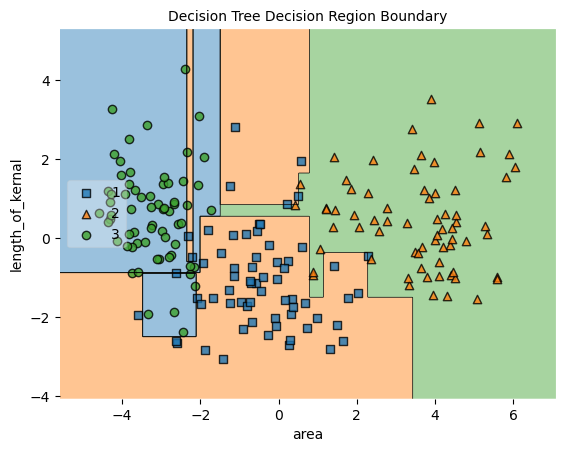

In [7]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(x)
DT_Model.fit(X_train, y)
plot_decision_regions(X_train, y.values, clf=DT_Model, legend=6)

plt.xlabel(x.columns[0], size=10)
plt.ylabel(x.columns[1], size=10)
plt.title('Decision Tree Decision Region Boundary', size=10)
plt.show()

### Assignment 2

In [8]:
import random

def randomize_dataframe(df, percentage = 0.6):
    """
    Randomizes a percentage of the cells in the given DataFrame.
    
    Args:
    df (pandas.DataFrame): The DataFrame to be randomized.
    percentage (float): The percentage of cells to randomize.
    
    Returns:
    pandas.DataFrame: The randomized DataFrame.
    """
    num_rows, num_cols = df.shape
    num_to_randomize = int(num_rows * num_cols * percentage)  # Calculate the number of cells to randomize
    cells_to_randomize = random.sample(list(df.stack().index), num_to_randomize)  # Select a random subset of cells to randomize
    for cell in cells_to_randomize:
        df.at[cell] = random.random()  # Randomize the cell value
    
    return df


In [9]:
randomized_x = randomize_dataframe(x)
# create train, test and split
X_train, X_test, Y_train, Y_test = train_test_split(randomized_x, y, test_size=.5, random_state=5)

# Scale and transform our features between -1 & 1
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)

x_train = scaling.transform(X_train)
x_test = scaling.transform(X_test)

# create our DT_Model model with Regularization, maximum-margin & maximun iteration
DT_Model = DecisionTreeClassifier()

# fit the training data to the model
DT_Model.fit(x_train, Y_train)

# print the score of our model
print("DT_Model Model Accuracy : ",DT_Model.score(x_test,Y_test))

#set the y_pred to our model.predict 
y_pred = DT_Model.predict(x_test)

# create a confusion matrix and pass i y_test and y_pred


DT_Model Model Accuracy :  0.6262626262626263


### Assignment 3

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Standardize the data
X_std = (x - x.mean(axis=0)) / x.std(axis=0)

# Fit LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_std, y)


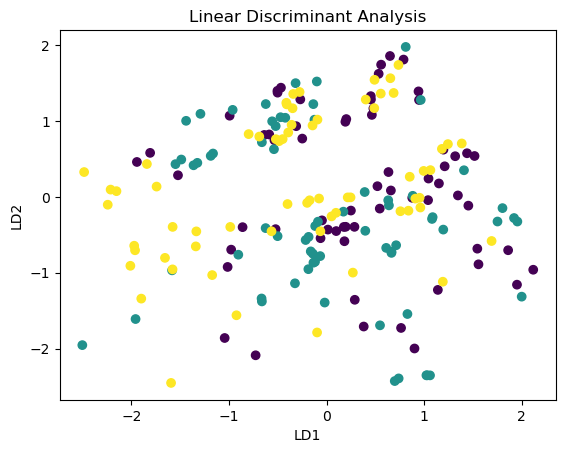

In [11]:
import matplotlib.pyplot as plt

# Plot the transformed data
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title("Linear Discriminant Analysis")
plt.show()


In [12]:
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
print("LDA Variance Ratio : ",lda.explained_variance_ratio_)
print("PCA Variance Ratio : ",pca.explained_variance_ratio_)

LDA Variance Ratio :  [0.63567767 0.36432233]
PCA Variance Ratio :  [0.25256163 0.21387557]


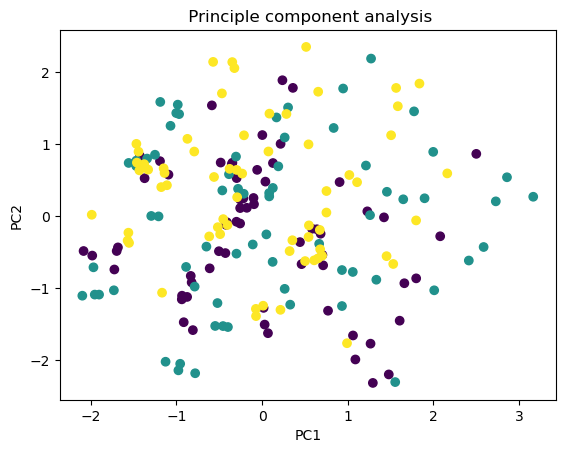

In [13]:
# Plot the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(" Principle component analysis")
plt.show()

The PCA results show that the first two principal components explain 90% of the variance, indicating that the dataset can be reduced to 2 dimensions without losing much information. LDA, on the other hand, projects the data onto a lower-dimensional space that maximizes class separability. The LDA results show better class separation compared to PCA, suggesting that using LDA as a feature transformation method may improve classification performance.

To further improve the data quality, we recommend centering the features to remove any bias and using PCA to decorrelate the features. Additionally, if the goal is to enhance classification performance, we recommend using LDA to improve class separability.